In [1]:
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Series (1D)

Series can hold any data type, and the axis label is called an index. Series is dict-like in that you can get and set values by index label.


In [7]:
s1 = pd.Series([2,4,6,np.nan,7,9])
s1

0    2.0
1    4.0
2    6.0
3    NaN
4    7.0
5    9.0
dtype: float64

In [8]:
# by default (without specifying them explicitly), the index label is just an int
s1[5]

9.0

DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

    dict of 1D ndarrays, lists, dicts, or Series
    2-D numpy.ndarray
    Series
    another DataFrame

N.B.: there are other helper methods for constructing DataFrames from varying data types; see the docs for more options.


In [10]:
# create a couple more Series
s2, s3 = pd.Series(np.random.randn(6)), pd.Series(np.random.randn(6))

In [11]:
# combine multiple Series into a DataFrame with column labels
df_1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3})

df_1

,A,B,C
0,2.0,0.734383,-0.399942
1,4.0,-0.060390,-1.519345
2,6.0,0.737956,0.169882
3,NaN,0.443666,-0.023781
4,7.0,0.871382,-0.826141
5,9.0,-1.577660,0.326234


In [12]:
# when Series are different lengths, DataFrame fills in gaps with NaN
s4 = pd.Series(np.random.randn(10))  # whoaaaaaa this Series has extra entries!

df1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4})

df1 

,A,B,C,D
0,2.0,0.734383,-0.399942,1.121779
1,4.0,-0.060390,-1.519345,-0.703658
2,6.0,0.737956,0.169882,-1.656675
3,NaN,0.443666,-0.023781,-0.026389
4,7.0,0.871382,-0.826141,1.126799
5,9.0,-1.577660,0.326234,-0.089319
6,NaN,NaN,NaN,-0.636754
7,NaN,NaN,NaN,0.817769
8,NaN,NaN,NaN,-0.529076
9,NaN,NaN,NaN,-2.530824


In [13]:
# create a DataFrame from numpy array
df2 = pd.DataFrame(np.random.randn(6,4))

df2             # can only have one 'pretty' output per cell (if it's the last command)

#print df2       # otherwise, can print arb number of results w/o pretty format
#print df1       # (uncomment both of these print statements)

,0,1,2,3
0,-1.625294,1.690174,-1.246473,-1.311705
1,-2.263506,1.217183,0.754604,1.217422
2,-0.359421,-0.478247,1.547304,-0.257815
3,1.935654,0.897464,0.818337,-0.804701
4,-1.030866,-0.841338,-0.141139,-1.682431
5,-0.725029,0.070908,0.355083,-1.014469


In [14]:
print df1
print df2

     A         B         C         D
0  2.0  0.734383 -0.399942  1.121779
1  4.0 -0.060390 -1.519345 -0.703658
2  6.0  0.737956  0.169882 -1.656675
3  NaN  0.443666 -0.023781 -0.026389
4  7.0  0.871382 -0.826141  1.126799
5  9.0 -1.577660  0.326234 -0.089319
6  NaN       NaN       NaN -0.636754
7  NaN       NaN       NaN  0.817769
8  NaN       NaN       NaN -0.529076
9  NaN       NaN       NaN -2.530824
          0         1         2         3
0 -1.625294  1.690174 -1.246473 -1.311705
1 -2.263506  1.217183  0.754604  1.217422
2 -0.359421 -0.478247  1.547304 -0.257815
3  1.935654  0.897464  0.818337 -0.804701
4 -1.030866 -0.841338 -0.141139 -1.682431
5 -0.725029  0.070908  0.355083 -1.014469


In [15]:
df2.tail()

,0,1,2,3
1,-2.263506,1.217183,0.754604,1.217422
2,-0.359421,-0.478247,1.547304,-0.257815
3,1.935654,0.897464,0.818337,-0.804701
4,-1.030866,-0.841338,-0.141139,-1.682431
5,-0.725029,0.070908,0.355083,-1.014469


In [16]:
df1.head()

,A,B,C,D
0,2.0,0.734383,-0.399942,1.121779
1,4.0,-0.060390,-1.519345,-0.703658
2,6.0,0.737956,0.169882,-1.656675
3,NaN,0.443666,-0.023781,-0.026389
4,7.0,0.871382,-0.826141,1.126799


In [17]:
df1.tail(2)

,A,B,C,D
8,NaN,NaN,NaN,-0.529076
9,NaN,NaN,NaN,-2.530824


In [18]:
cols =["e", "f", "g", "h"]

In [20]:
df2.columns = cols
df2

,e,f,g,h
0,-1.625294,1.690174,-1.246473,-1.311705
1,-2.263506,1.217183,0.754604,1.217422
2,-0.359421,-0.478247,1.547304,-0.257815
3,1.935654,0.897464,0.818337,-0.804701
4,-1.030866,-0.841338,-0.141139,-1.682431
5,-0.725029,0.070908,0.355083,-1.014469


In [22]:
# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2013-11-24 13:45:27', freq='W', periods=6)
df2.index = dates
df2

,e,f,g,h
2013-11-24 13:45:27,-1.625294,1.690174,-1.246473,-1.311705
2013-12-01 13:45:27,-2.263506,1.217183,0.754604,1.217422
2013-12-08 13:45:27,-0.359421,-0.478247,1.547304,-0.257815
2013-12-15 13:45:27,1.935654,0.897464,0.818337,-0.804701
2013-12-22 13:45:27,-1.030866,-0.841338,-0.141139,-1.682431
2013-12-29 13:45:27,-0.725029,0.070908,0.355083,-1.014469


Do some indexing / subsetting...

In [23]:
# select a row by index label by using .loc 
df2.loc['2013-12-22 13:45:27']

e   -1.030866
f   -0.841338
g   -0.141139
h   -1.682431
Name: 2013-12-22 13:45:27, dtype: float64

In [31]:
# select a single element 
df2.loc['2013-12-22 13:45:27','g']

-0.14113854092300773

In [37]:
# new dataframe with random numbers
df1 = pd.DataFrame(np.random.randn(7,5), index=list('mnopqrs'),columns=list('MNOPQ'))

df1

,M,N,O,P,Q
m,-0.104236,-0.029624,-0.563004,-0.215412,0.374901
n,0.029397,-0.709907,-0.302343,-0.127998,0.657620
o,-1.751403,1.187475,1.856299,0.095921,0.664560
p,1.122847,1.302393,0.607763,1.238256,0.037648
q,0.290475,-0.281514,0.899840,-0.340323,0.475456
r,1.012709,1.525092,0.675494,-0.085928,0.065423
s,1.110397,-0.583521,0.077153,-1.322935,0.083257


In [39]:
# address two separate rows, and a range of three columns
df1.loc[['m','n'],'O':'Q']

,O,P,Q
m,-0.563004,-0.215412,0.374901
n,-0.302343,-0.127998,0.657620


In [40]:
# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2013-11-24 13:45:27', freq='W', periods=6)
df2.index = dates

df2

,e,f,g,h
2013-11-24 13:45:27,-1.625294,1.690174,-1.246473,-1.311705
2013-12-01 13:45:27,-2.263506,1.217183,0.754604,1.217422
2013-12-08 13:45:27,-0.359421,-0.478247,1.547304,-0.257815
2013-12-15 13:45:27,1.935654,0.897464,0.818337,-0.804701
2013-12-22 13:45:27,-1.030866,-0.841338,-0.141139,-1.682431
2013-12-29 13:45:27,-0.725029,0.070908,0.355083,-1.014469


# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dates

In [43]:
# select a row by index label by using .loc 
df2.loc['2013-12-01 13:45:27']


e   -2.263506
f    1.217183
g    0.754604
h    1.217422
Name: 2013-12-01 13:45:27, dtype: float64

In [45]:
# select a single element
df2.loc['2013-12-22 13:45:27','f']

-0.84133830063420689

In [47]:
# new dataframe with random numbers
df1 = pd.DataFrame(np.random.randn(6,4), index=list('pqrstu'),columns=list('PQRS'))

df1

,P,Q,R,S
p,0.867070,-1.024053,0.040272,0.986186
q,-1.077158,-0.095878,0.764808,0.863232
r,0.971399,-0.760674,0.607436,0.636034
s,1.053625,0.808851,-1.213012,-0.558364
t,0.885746,-0.037914,1.635977,0.632236
u,-0.876134,0.851582,1.796968,-0.049198


In [48]:
# address two separate rows, and a range of three columns
df1.loc[['r','s'],'P':'S']

,P,Q,R,S
r,0.971399,-0.760674,0.607436,0.636034
s,1.053625,0.808851,-1.213012,-0.558364


part 2: data

In the data/ directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.


In [53]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [64]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=colnames)

df1.head(5)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [65]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print df1.columns
print df1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns

Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')
Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOf

In [66]:
# have a peek
df1.tail(4)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.


In [59]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
df1[df1.twitter_lang == 'en'].head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [60]:
# create new dataframe from numerical columns
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [61]:
# because I happen to know the answer, let's check data types of the columns...
df2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [62]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:categorical plots <categorical_tutorial> chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.


In [68]:
%matplotlib inline

In [69]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [70]:
import seaborn as sns
sns.set(color_codes=True)

In [71]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the *distplot function. By default, this will draw a histogram <https://en.wikipedia.org/wiki/Histogram>_ and fit a kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>_ (KDE).


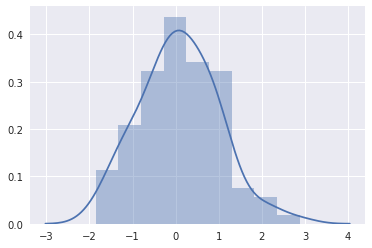

In [72]:
x = np.random.normal(size=100)
sns.distplot(x);


Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot function, but it is also available in distplot:


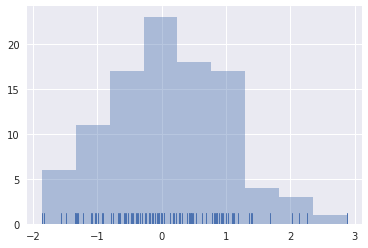

In [73]:
sns.distplot(x, kde=False, rug=True);

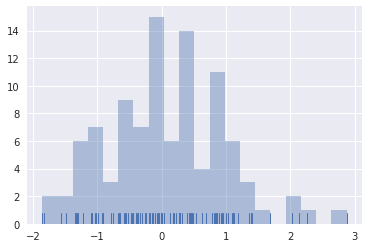

In [76]:
sns.distplot(x, bins=20, kde=False, rug=True);

Kernel density estimaton

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:


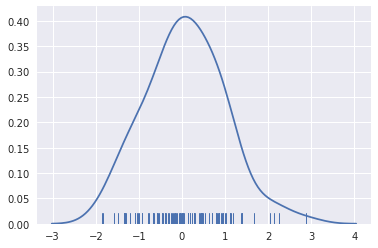

In [78]:
sns.distplot(x, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:


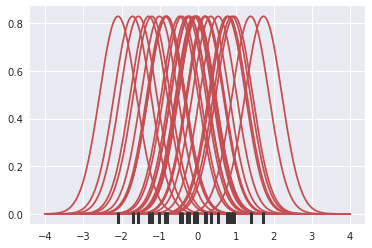

In [82]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

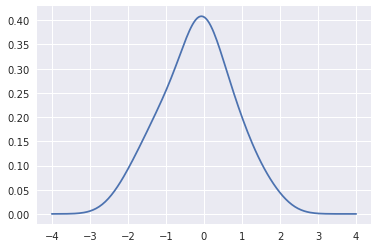

In [83]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the kdeplot function in seaborn, we get the same curve. This function is used by distplot, but it provides a more direct interface with easier access to other options when you just want the density estimate:

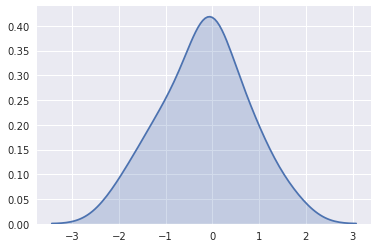

In [85]:
sns.kdeplot(x, shade=True);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

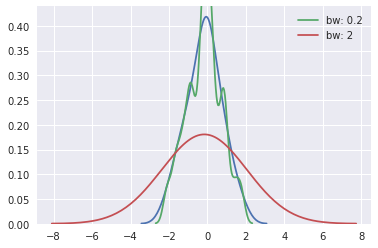

In [86]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the cut parameter; however, this only influences how the curve is drawn and not how it is fit:

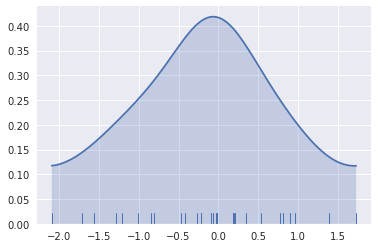

In [87]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

Fitting parametric distributions

You can also use distplot to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:


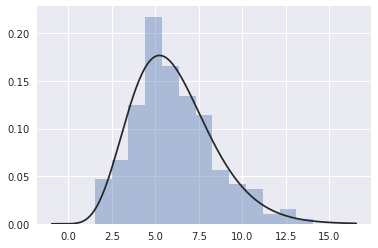

In [88]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the *jointplot function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.


In [89]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot function:


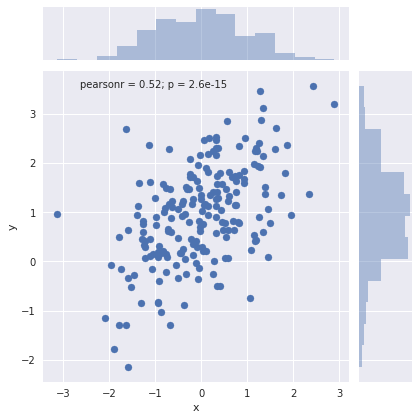

In [90]:
sns.jointplot(x="x", y="y", data=df);

Hexbin plots

The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib plt.hexbin function and as a style in jointplot. It looks best with a white background:


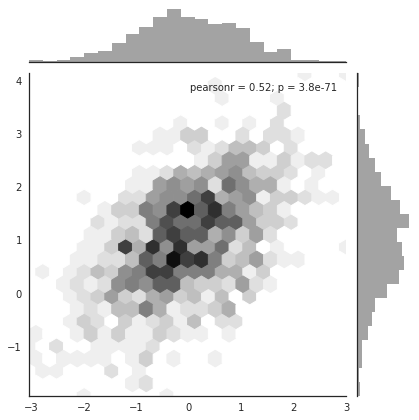

In [91]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:


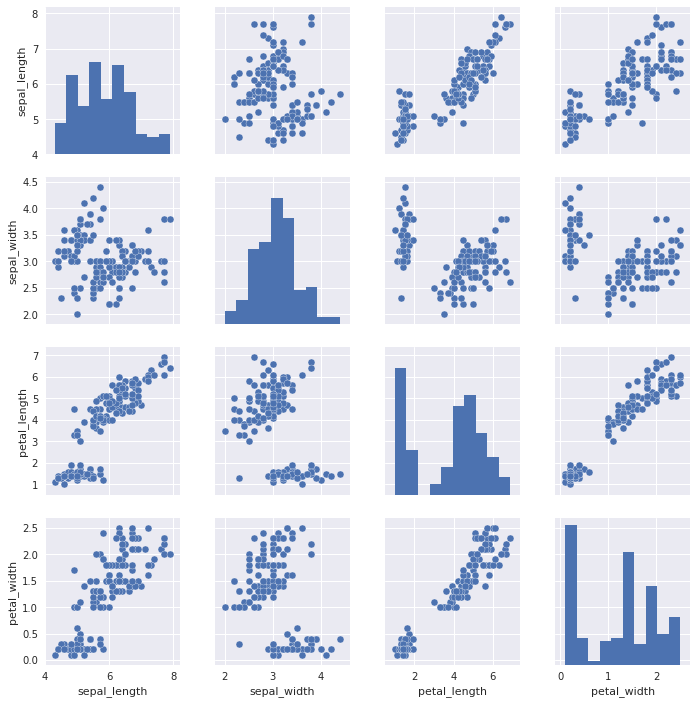

In [92]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Visualizing linear relationships

In [93]:
%matplotlib inline

In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns
sns.set(color_codes=True)

In [96]:
np.random.seed(sum(map(ord, "regression")))

In [97]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot and lmplot are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:


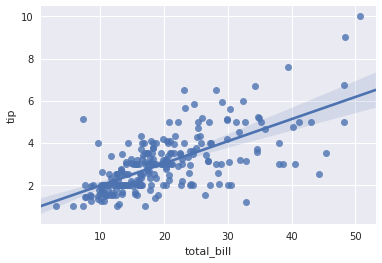

In [98]:
sns.regplot(x="total_bill", y="tip", data=tips);

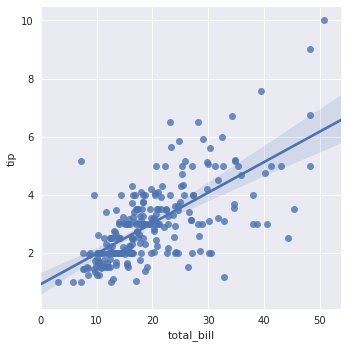

In [99]:
sns.lmplot(x="total_bill", y="tip", data=tips);

Fitting different kinds of models

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:


In [100]:
anscombe = sns.load_dataset("anscombe")

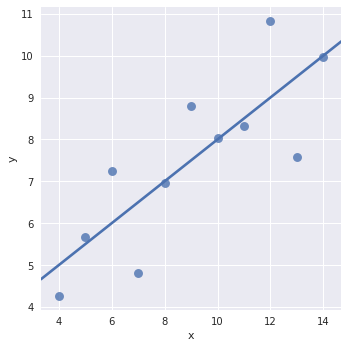

In [101]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

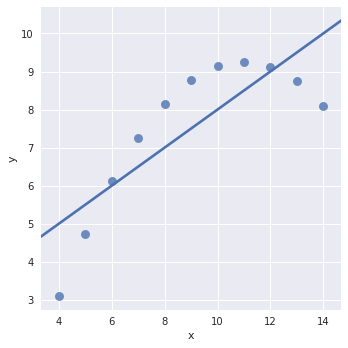

In [102]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, lmplot and regplot can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

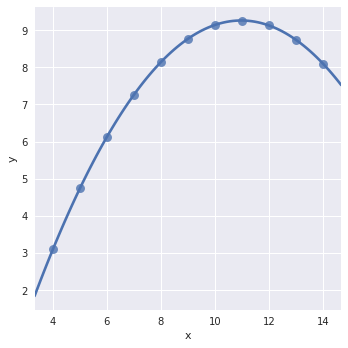

In [103]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:


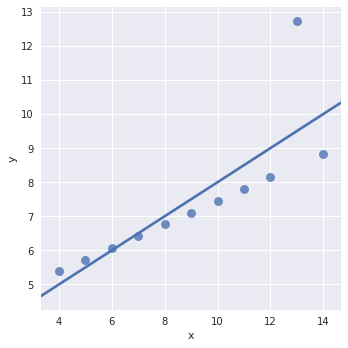

In [104]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

Conditioning on other variables

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference between regplot and lmplot appears. While regplot always shows a single relationship, lmplot combines regplot with FacetGrid to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:


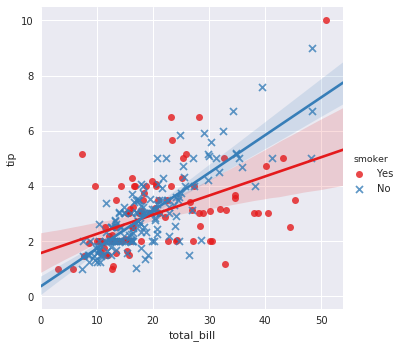

In [105]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each distribution of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions swarmplot and stripplot, the second includes boxplot and violinplot, and the third includes barplot and pointplot. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between regplot and lmplot, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level factorplot, which combines these functions with a FacetGrid to apply a categorical plot across a grid of figure panels.



In [106]:
%matplotlib inline

In [107]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [108]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [109]:
np.random.seed(sum(map(ord, "categorical")))

In [110]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Categorical scatterplots

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses *stripplot, which generalizes a scatterplot to the case where one of the variables is categorical:


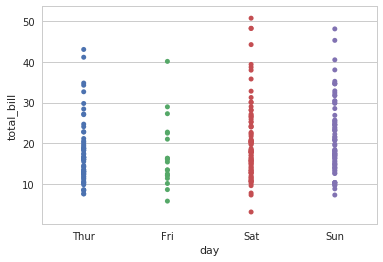

In [111]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

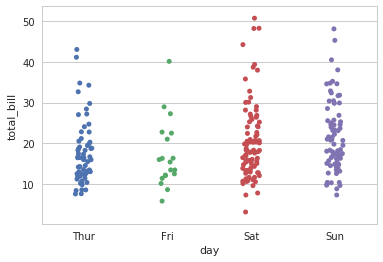

In [112]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

A different approach would be to use the function *swarmplot, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

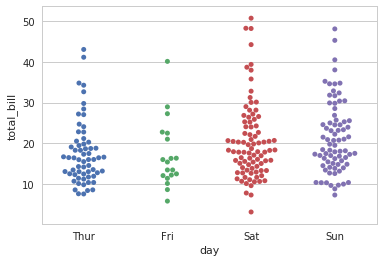

In [113]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the hue parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

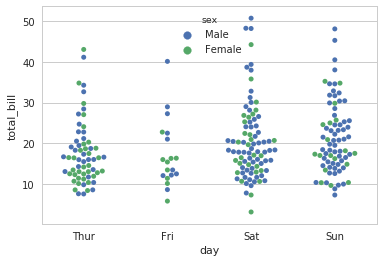

In [114]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). You can force an orientation using the orient keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to x and/or y:

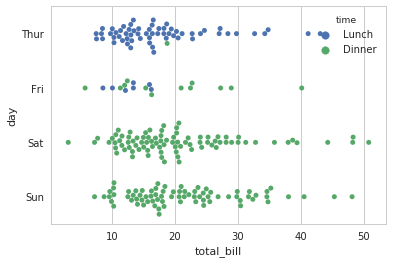

In [115]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

Distributions of observations within categories

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:chapter <distribution_tutorial> to the case where we want to quickly compare across several distributions.

Boxplots ^^^^^^^^

The first is the familiar *boxplot. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

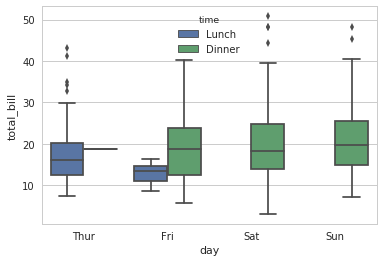

In [116]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

For boxplots, the assumption when using a hue variable is that it is nested within the x or y variable. This means that by default, the boxes for different levels of hue will be offset, as you can see above. If your hue variable is not nested, you can set the dodge parameter to disable offsetting:

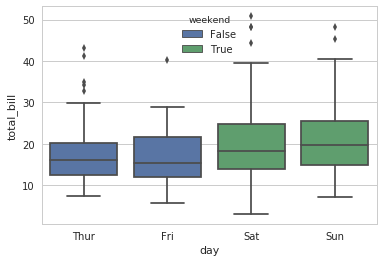

In [117]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

Violinplots ^^^^^^^^^^^

A different approach is a *violinplot, which combines a boxplot with the kernel density estimation procedure described in the :ref:distributions <distribution_tutorial> tutorial:


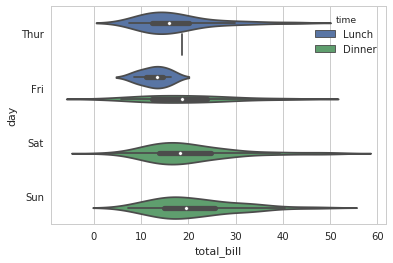

In [118]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

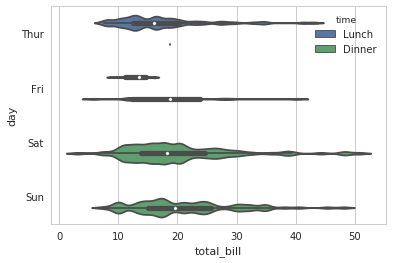

In [119]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

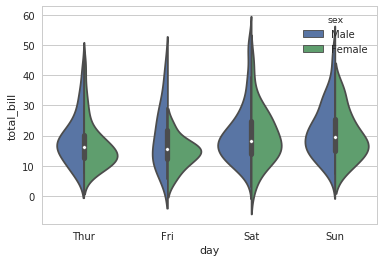

In [120]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

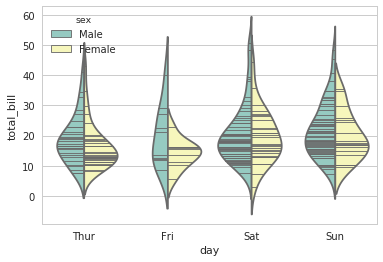

In [121]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

It can also be useful to combine swarmplot or swarmplot with violinplot or boxplot to show each observation along with a summary of the distribution:


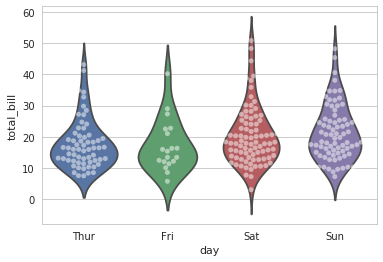

In [122]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

Statistical estimation within categories

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.
Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:


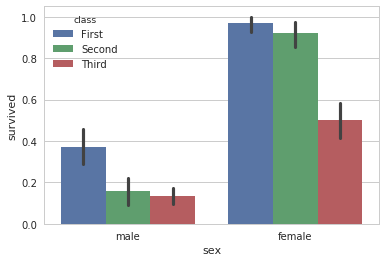

In [123]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the *countplot function:

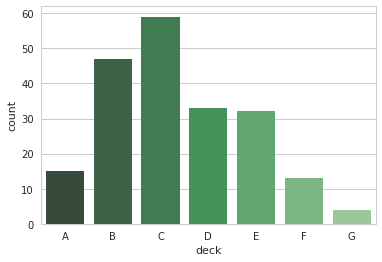

In [124]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

Both barplot and countplot can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

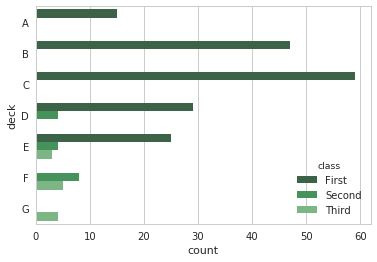

In [125]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

Point plots

An alternative style for visualizing the same information is offered by the pointplot function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:


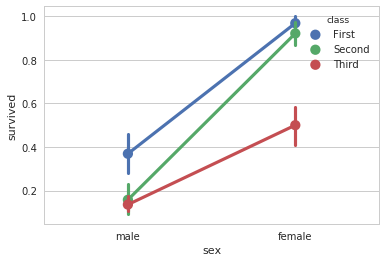

In [126]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

Plotting "wide-form" data

While using "long-form" or "tidy" data is preferred, these functions can also by applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:


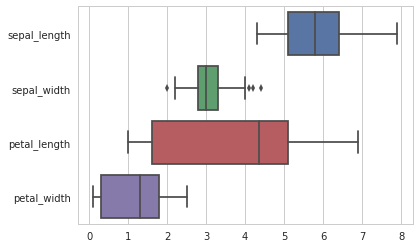

In [127]:
sns.boxplot(data=iris, orient="h");

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a DataFrame:


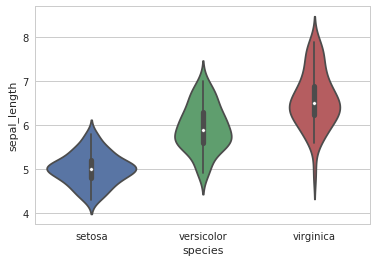

In [128]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

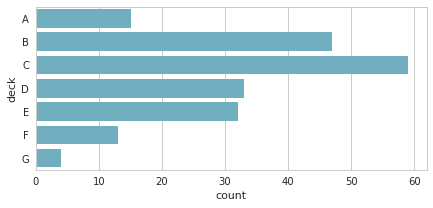

In [129]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

Drawing multi-panel categorical plots

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function factorplot, which combines these functions with a FacetGrid to add the ability to examine additional categories through the larger structure of the figure. By default, factorplot produces a pointplot:


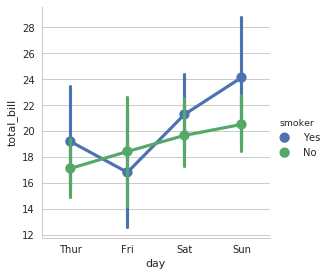

In [130]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

However, the kind parameter lets you chose any of the kinds of plots discussed above:


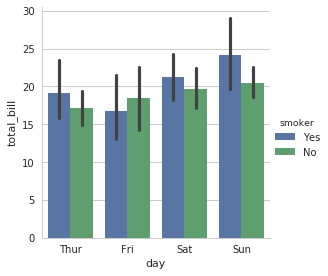

In [131]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

The main advantage of using a factorplot is that it is very easy to "facet" the plot and investigate the role of other categorical variables:

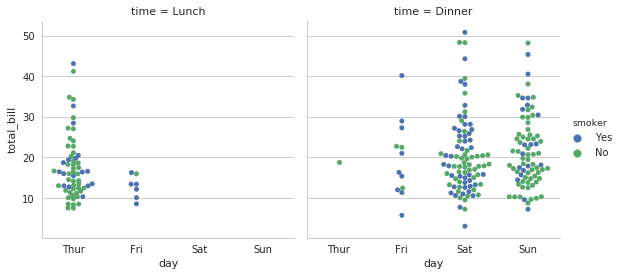

In [132]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

Any kind of plot can be drawn. Because of the way :class:FacetGrid works, to change the size and shape of the figure you need to specify the size and aspect arguments, which apply to each facet:

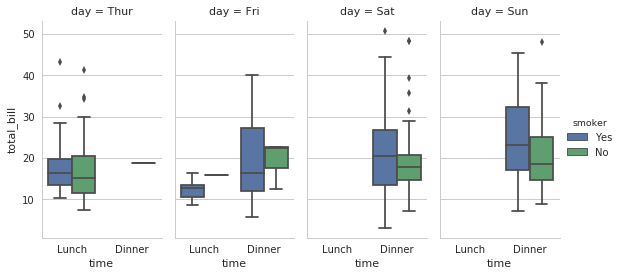

In [133]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

It is important to note that you could also make this plot by using boxplot and :class:FacetGrid directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a Categorical datatype or by passing order and hue_order.

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a :class:PairGrid to show categorical relationships across several different variables:


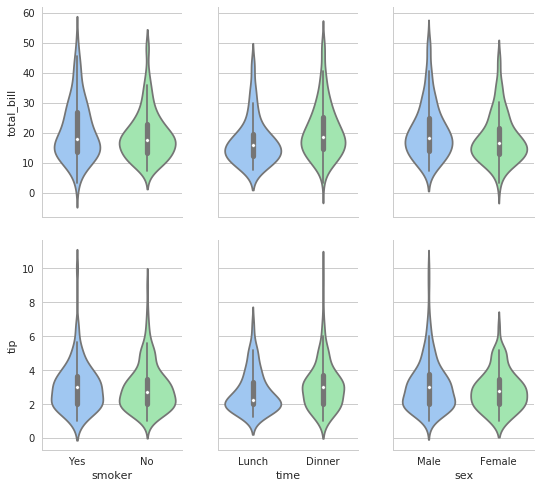

In [135]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");